# **Classification**


## Overview
The notebook provides a comprehensive guide on classification using deep learning, with a focus on practical implementation and comparison of different training approaches.

> Attribution: Based on the original work from https://github.com/NIGMS/Biomedical-Imaging-Analysis-using-AI-ML-Approaches. This version includes bug fixes, enhanced documentation, and code improvements.

## Learning Objectives
+ **Classification**
    - ``Overview``: Introduction to classification and its importance, particularly in image recognition.
    - ``Focus``: Using deep learning algorithms for classification.
+ **Deep Learning**
    - ``Definition``: Explanation of deep learning and its advantages over traditional classification methods.
    - ``Architecture``: Description of neural networks, including the significance of multiple layers.
    - ``Training``: Discussion on training deep learning networks using known labels and testing on unknown labels.
    - ``Experimentation``: Mention of experimenting with ResNet architecture using the ImageNet and PathMNIST datasets.
+ **Transfer Learning**
    - ``Definition``: Explanation of transfer learning and its benefits.
    - ``Advantages``: Reasons for using transfer learning, such as the need for large datasets and computational resources.
    - ``Objective``: Conducting experiments to demonstrate the effectiveness of transfer learning using ResNet-18.

## Prerequisites

**Data**
- ``PathMNIST Dataset``: Automatically downloaded and prepared using the Prepare_Data function.
- ``ImageNet Pre-trained Model``: Utilized for transfer learning experiments.

**Library Dependencies**

* ``pytorch`` and ``torchvision``: these libraries focus on designing machine learning models.
* ``medmnist``: this library is specifically designed for reading and processing the MedMNIST dataset. It includes functions for data preperation and formating.
* ``tqdm``: a library used to display the progress of code loops.


## Get Started

Classification is the process of categorizing a set of data into separate classes. Image recognition, the task of identifying the label corresponding to an image, is crucial for classification and can become difficult as number of classes increase. This tutorial will focus on using deep learning algorithms for classification.


### What is Deep Learning?
---
<img src="./Images/1.gif" alt="drawing" width="1000"/>

Deep learning is a machine learning method used to train a computer to recognize patterns in data. Deep learning is useful for classification because it is customized for the training data making it more accurate than traditional classification methods. This method consists of a neural network with three or more layers. These neural networks attempt to simulate the behavior of the human brain “learning” from large amounts of data. While a neural network with a single layer can still make approximate predictions, additional hidden layers can help to optimize and refine for accuracy. However, adding more hidden layers will reduce the training speed because the network will have more parameters (weights) to calibrate. 

Deep learning networks are typically trained on data for which the labels are known, then tested on data for which labels are unknown from the same dataset. 

In this submodule we will be experimenting with the [ResNet](https://arxiv.org/abs/1512.03385) deep learning architecture using the [1000-class Imagenet dataset](https://image-net.org/download.php) which is a large collection of images of everyday objects and [PathMNIST](https://medmnist.com/) which is a collection of pathology images. We will be using a popular technique in deep learning for classification named transfer learning.  

### What is Transfer Learning?
---

Transfer learning (TL) focuses on gaining knowledge from one dataset and using it to classify data from another dataset. It leverages the already existing data so the network can quickly achieve good accuracy.
<img src="./Images/2.jpg" alt="drawing" width="1000"/>

### Why transfer learning?
---

Suppose you have 100 images of cats and 100 dogs and want to build a model to classify the images. This is a relatively small dataset and the network trained on this dataset would not be able to learn all the information about the data. Hence, the trained network would be less accurate on testing dataset. Enter transfer learning. There are two big reasons why you want to use transfer learning:

1) Training models with high accuracy requires a lot of data. For example, the ImageNet dataset contains over 1 million images. In the real world, you are unlikely to have such a large dataset. 

2) Assuming that you had that kind of dataset, you might still not have the resources required to train a model on such a large dataset. 

Hence transfer learning makes a lot of sense if you don’t have the compute resources needed to train models on huge datasets. Even if you had the compute resources at your disposal, you still must wait for days or weeks to train such a model. Therefore, using a pre-trained model will save you precious time. 


### Objective

To elaborate further about the effectiveness of transfer learning we will conduct 3 experiments using ResNet-18 model. This model consists of a feature extractor and a classifier. The feature extractor extracts relevant information from the images that the classifier uses for decision making (classification). 

The <a href="#A">first experiment</a> involves training the classifier without using transfer learning. This means that all the weights are initialized randomly. All the layers of the model are trainable which means that all the parameters (weights) of the model is being optimized. 

In the <a href="#B">second experiment</a>, we introduce transfer learning with feature extraction. We use ImageNet-1000 dataset to train the feature extractor only. We then use the trained feature extractor that leverages the information learned from ImageNet to extract the features from the new dataset (PathMNIST). The classifier is modified and trained on PathMNIST.

Finally, in the <a href="#C">third experiment</a>, we introduce transfer learning with feature extraction finetuning. We use ImageNet-1000 dataset to train the feature extractor. The main difference between this experiment and the previous one is the finetuning meaning that the feature extractor is not fixed and will be trained on PathMNIST. The classifier is modified and trained on PathMNIST.

### Notebook workflow:
---

- <a href="#0">Install and Load Dataset</a></br>
- <a href="#A">A. Training ``ResNet`` from scratch</a></br>
    1. <a href="#A1">Create ResNet-18 model with random initialization and set the weights to be learned from scratch.</a></br>
    2. <a href="#A2">Train on training dataset.</a></br>
    3. <a href="#A3">Evaluate on testing dataset.</a></br>
- <a href="#B">B. Training ``ResNet`` using Transfer Learning with Feature Extraction</a></br>
    1. <a href="#B1">Create ``ResNet-18`` Model pretrained on ``ImageNet`` and turn on learning only for final layers.</a></br>
    2. <a href="#B2">Train on training dataset.</a></br>
    3. <a href="#B3">Evaluate on testing dataset.</a></br>
- <a href="#C">C. Training ``ResNet`` using Transfer Learning without Feature Extraction</a></br>
    1. <a href="#C1">Create ``ResNet-18 Model`` pretrained on ``ImageNet`` and turn on learning on all Layers.</a></br>
    2. <a href="#C2">Train on training dataset.</a></br>
    3. <a href="#C3">Evaluate on testing dataset.</a></br>
- <a href="#1">Results</a></br>   
- <a href="#2">Conclusion</a></br> 


## <a name="0">Install and Load Dataset</a> 
---
``PathMNIST`` is mainly used to predict survival in cancer histological sections. They are Images of size 3 × 28 × 28 pixels. The PathMNIST dataset consists of 9 classes and the number of images are 107,180 split into (training / validation / testing) as (89,996 / 10,004 / 7,180) respectivly.

In the following steps we demonstrate how download the PathMNIST dataset and install the library used to manipulate it.

We start by running pip installer to install necessary libraries.

In [1]:
!pip install --upgrade pip
# Setuptools is set to version 70.0.0 due later versions having conflicts/errors 
!pip install --upgrade setuptools==70.0.0

In [2]:
!pip install medmnist torchshow torchvision torch tqdm

In [3]:
from PrepareDataset import Prepare_Data, Get_DataSet_Information

In [4]:
from Loops import train_loop, test_loop

In [5]:
from Model import Create_Model_Optimizer_Criterion

Using downloaded and verified file: /home/ec2-user/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/ec2-user/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/ec2-user/.medmnist/pathmnist.npz


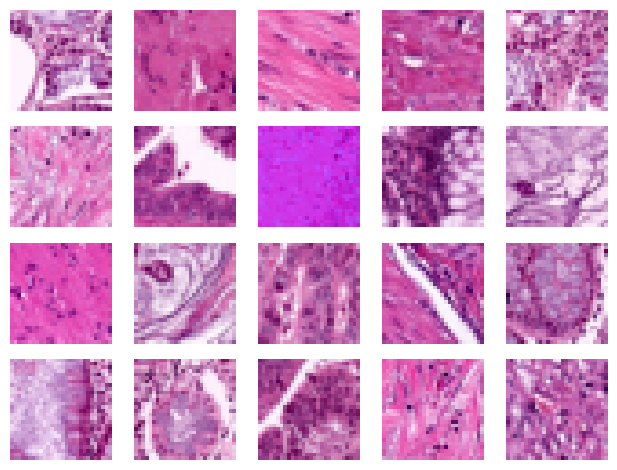

In [6]:
(Train_Loader, Val_Loader, Test_Loader, Train_Evaluator, Test_Evaluator) = Prepare_Data(data_flag = 'pathmnist', download = True, batch_size = 128)
(Task, Num_Classes) = Get_DataSet_Information(data_flag = 'pathmnist')

<div class="alert alert-block alert-info"> <b>Knowledge Check</b> </div>

In [7]:
!pip install jupyterquiz==2.0.7 --quiet
from jupyterquiz import display_quiz
display_quiz('../quiz_files/submodule_01/kc1.json')

<IPython.core.display.Javascript object>

## <a name="A">A. Training ``ResNet`` from scratch</a> 
---
In the following steps we demonstrate how to train a ResNet Model from scratch. The weights for all the layers are initialized randomly and learned throughout the training process only on PathMNIST.

####    1. <a name="A1">Create ``ResNet-18`` model with random initialization and set the weights to be learned from scratch.</a> 

In [8]:
(Model, Optimizer, Criterion) = Create_Model_Optimizer_Criterion(n_classes = Num_Classes, feature_extract = False, use_pretrained = False)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Params to learn:
	 conv1.weight
	 bn1.weight
	 bn1.bias
	 layer1.0.conv1.weight
	 layer1.0.bn1.weight
	 layer1.0.bn1.bias
	 layer1.0.conv2.weight
	 layer1.0.bn2.weight
	 layer1.0.bn2.bias
	 layer1.1.conv1.weight
	 layer1.1.bn1.weight
	 layer1.1.bn1.bias
	 layer1.1.conv2.weight
	 layer1.1.bn2.weight
	 layer1.1.bn2.bias
	 layer2.0.conv1.weight
	 layer2.0.bn1.weight
	 layer2.0.bn1.bias
	 layer2.0.conv2.weight
	 layer2.0.bn2.weight
	 layer2.0.bn2.bias
	 layer2.0.downsample.0.weight
	 layer2.0.downsample.1.weight
	 layer2.0.downsample.1.bias
	 layer2.1.conv1.weight
	 layer2.1.bn1.weight
	 layer2.1.bn1.bias
	 layer2.1.conv2.weight
	 layer2.1.bn2.weight
	 layer2.1.bn2.bias
	 layer3.0.conv1.weight
	 layer3.0.bn1.weight
	 layer3.0.bn1.bias
	 layer3.0.conv2.weight
	 layer3.0.bn2.weight
	 layer3.0.bn2.bias
	 layer3.0.downsample.0.weight
	 layer3.0.downsample.1.weight
	 layer3.0.downsample.1.bias
	 layer3.1.conv1.weight
	 layer3.1.bn1.weight
	 layer3.1.bn1.bias
	 layer3.1.conv2.weight
	 layer3.1.b

####    2. <a name="A2">Train on training dataset.</a> 

In [9]:
Scratch = train_loop(Model, Train_Loader, Val_Loader, Criterion, Optimizer, Train_Evaluator, num_epochs=5)

100%|██████████| 704/704 [02:38<00:00,  4.44it/s]


==> Evaluating at Epoch  0 ...


100%|██████████| 79/79 [00:05<00:00, 14.97it/s]


val  auc: 0.969  acc:0.759


100%|██████████| 704/704 [02:22<00:00,  4.93it/s]


==> Evaluating at Epoch  1 ...


100%|██████████| 79/79 [00:05<00:00, 14.26it/s]


val  auc: 0.943  acc:0.600


100%|██████████| 704/704 [02:17<00:00,  5.10it/s]


==> Evaluating at Epoch  2 ...


100%|██████████| 79/79 [00:05<00:00, 14.20it/s]


val  auc: 0.983  acc:0.826


100%|██████████| 704/704 [02:10<00:00,  5.38it/s]


==> Evaluating at Epoch  3 ...


100%|██████████| 79/79 [00:05<00:00, 14.73it/s]


val  auc: 0.987  acc:0.818


100%|██████████| 704/704 [02:27<00:00,  4.77it/s]


==> Evaluating at Epoch  4 ...


100%|██████████| 79/79 [00:06<00:00, 12.04it/s]

val  auc: 0.984  acc:0.791


####    3. <a name="A3">Evaluate on testing dataset.</a> 

In [10]:
ScratchMetric = test_loop(Model, Test_Loader, Test_Evaluator)

100%|██████████| 57/57 [00:05<00:00, 10.64it/s]


test  auc: 0.950  acc:0.672


## <a name="B">B. Training ``ResNet`` using Transfer Learning with Feature Extraction</a> 
---
In the following steps we demonstrate how to use a ResNet Model pretrained on ImageNet and retrain the last layer on the PathMNIST dataset.


####    1. <a name="B1">Create ``ResNet-18`` Model pretrained on ``ImageNet`` and turn on learning only for final layers.</a> 

Note that we set feature_extract=True and use_pretrained=true

In [11]:
(Model, Optimizer, Criterion) = Create_Model_Optimizer_Criterion(n_classes = Num_Classes, feature_extract = True, use_pretrained = True)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Params to learn:
	 fc.weight
	 fc.bias


####    2. <a name="B2">Train on training dataset.</a> 

In [12]:
FinalLayers = train_loop(Model, Train_Loader, Val_Loader, Criterion, Optimizer, Train_Evaluator, num_epochs=5)

100%|██████████| 704/704 [01:35<00:00,  7.35it/s]


==> Evaluating at Epoch  0 ...


100%|██████████| 79/79 [00:16<00:00,  4.79it/s]


val  auc: 0.938  acc:0.691


100%|██████████| 704/704 [01:35<00:00,  7.35it/s]


==> Evaluating at Epoch  1 ...


100%|██████████| 79/79 [00:11<00:00,  7.18it/s]


val  auc: 0.944  acc:0.708


100%|██████████| 704/704 [01:22<00:00,  8.49it/s]


==> Evaluating at Epoch  2 ...


100%|██████████| 79/79 [00:06<00:00, 12.83it/s]


val  auc: 0.947  acc:0.712


100%|██████████| 704/704 [01:37<00:00,  7.20it/s]


==> Evaluating at Epoch  3 ...


100%|██████████| 79/79 [00:08<00:00,  9.06it/s]


val  auc: 0.948  acc:0.718


100%|██████████| 704/704 [01:58<00:00,  5.96it/s]


==> Evaluating at Epoch  4 ...


100%|██████████| 79/79 [00:07<00:00, 10.55it/s]

val  auc: 0.948  acc:0.716


####    3. <a name="B3">Evaluate on testing dataset.</a> 

In [13]:
FinalLayerMetric = test_loop(Model, Test_Loader, Test_Evaluator)

100%|██████████| 57/57 [00:05<00:00, 10.67it/s]

test  auc: 0.931  acc:0.717


## <a name="C">C. Training ``ResNet`` using Transfer Learning without Feature Extraction</a> 
---
In the following steps we demonstrate how to use a pretrained ResNet Model on ImageNet and train the all layers on PathMNIST. In this case the weights of ResNet model are transfered from ImageNet dataset and used as a starting weights for learning on PathMNIST. 

####    1. <a name="C1">Create ``ResNet-18`` Model pretrained on ImageNet and turn on learning on all Layers</a> 

In [15]:
(Model, Optimizer, Criterion) = Create_Model_Optimizer_Criterion(n_classes = Num_Classes, feature_extract = False, use_pretrained = True)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Params to learn:
	 conv1.weight
	 bn1.weight
	 bn1.bias
	 layer1.0.conv1.weight
	 layer1.0.bn1.weight
	 layer1.0.bn1.bias
	 layer1.0.conv2.weight
	 layer1.0.bn2.weight
	 layer1.0.bn2.bias
	 layer1.1.conv1.weight
	 layer1.1.bn1.weight
	 layer1.1.bn1.bias
	 layer1.1.conv2.weight
	 layer1.1.bn2.weight
	 layer1.1.bn2.bias
	 layer2.0.conv1.weight
	 layer2.0.bn1.weight
	 layer2.0.bn1.bias
	 layer2.0.conv2.weight
	 layer2.0.bn2.weight
	 layer2.0.bn2.bias
	 layer2.0.downsample.0.weight
	 layer2.0.downsample.1.weight
	 layer2.0.downsample.1.bias
	 layer2.1.conv1.weight
	 layer2.1.bn1.weight
	 layer2.1.bn1.bias
	 layer2.1.conv2.weight
	 layer2.1.bn2.weight
	 layer2.1.bn2.bias
	 layer3.0.conv1.weight
	 layer3.0.bn1.weight
	 layer3.0.bn1.bias
	 layer3.0.conv2.weight
	 layer3.0.bn2.weight
	 layer3.0.bn2.bias
	 layer3.0.downsample.0.weight
	 layer3.0.downsample.1.weight
	 layer3.0.downsample.1.bias
	 layer3.1.conv1.weight
	 layer3.1.bn1.weight
	 layer3.1.bn1.bias
	 layer3.1.conv2.weight
	 layer3.1.b

####    2. <a name="C2">Train on training dataset.</a> 

In [16]:
FineTuned = train_loop(Model, Train_Loader, Val_Loader, Criterion, Optimizer, Train_Evaluator, num_epochs=5)

100%|██████████| 704/704 [04:02<00:00,  2.91it/s]


==> Evaluating at Epoch  0 ...


100%|██████████| 79/79 [00:07<00:00,  9.90it/s]


val  auc: 0.993  acc:0.900


100%|██████████| 704/704 [04:22<00:00,  2.68it/s]


==> Evaluating at Epoch  1 ...


100%|██████████| 79/79 [00:08<00:00,  9.46it/s]


val  auc: 0.995  acc:0.921


100%|██████████| 704/704 [03:10<00:00,  3.69it/s]


==> Evaluating at Epoch  2 ...


100%|██████████| 79/79 [00:06<00:00, 11.35it/s]


val  auc: 0.996  acc:0.927


100%|██████████| 704/704 [02:29<00:00,  4.70it/s]


==> Evaluating at Epoch  3 ...


100%|██████████| 79/79 [00:05<00:00, 14.08it/s]


val  auc: 0.996  acc:0.929


100%|██████████| 704/704 [02:51<00:00,  4.10it/s]


==> Evaluating at Epoch  4 ...


100%|██████████| 79/79 [00:06<00:00, 12.21it/s]


val  auc: 0.997  acc:0.935


####    3. <a name="C3">Evaluate on testing dataset.</a> 

In [17]:
FineTunedMetric = test_loop(Model, Test_Loader, Test_Evaluator)

100%|██████████| 57/57 [00:03<00:00, 14.46it/s]


test  auc: 0.984  acc:0.863


<div class="alert alert-block alert-info"> <b>Knowledge Check</b> </div>

In [18]:
display_quiz('../quiz_files/submodule_01/kc2.json')

<IPython.core.display.Javascript object>

## <a name="1">Results</a> 
---
We start by comparing the accuracies during training of the three experiments. We compare the testing accuracies on PathMNIST. Accuracy is a widely used metric that measures how well the predicted labels match the actual labels.

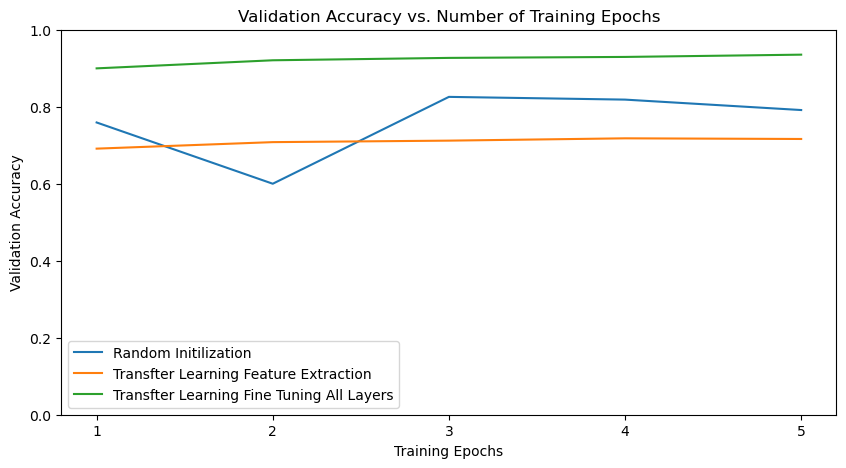

In [19]:
# Plot the training curves of validation accuracy vs. number 
#  of training epochs for the transfer learning methods and
#  the model trained from scratch
import matplotlib.pyplot as plt
import numpy as np
ohist = []
shist = []

SHlist = [float(h) for h in Scratch]
FLlist = [float(h) for h in FinalLayers]
FTlist = [float(h) for h in FineTuned]

fig = plt.figure(figsize = (10, 5))

plt.title("Validation Accuracy vs. Number of Training Epochs")
plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")
plt.plot(range(1, 6), SHlist, label = "Random Initilization")
plt.plot(range(1, 6), FLlist, label = "Transfter Learning Feature Extraction")
plt.plot(range(1,6), FTlist, label = "Transfter Learning Fine Tuning All Layers")
plt.ylim((0, 1.))
plt.xticks(np.arange(1, 6, 1.0))
plt.legend()
plt.show()

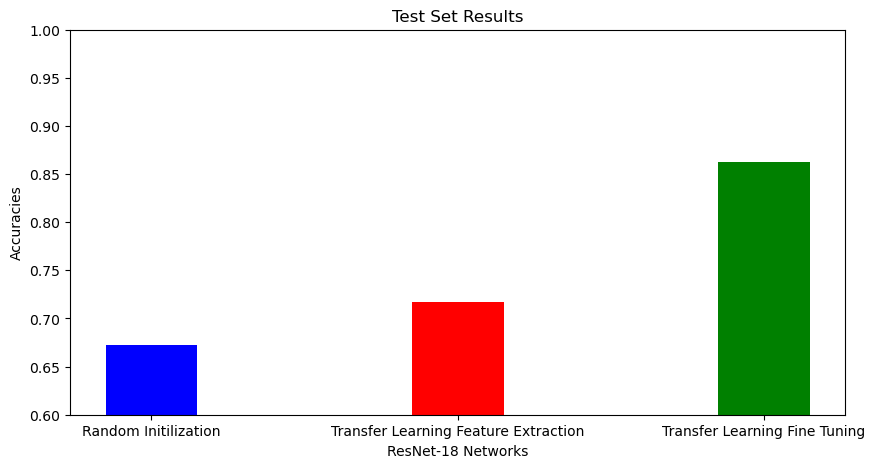

In [20]:
# Test comparison
data = {}
data['Random Initilization'] = ScratchMetric[1]
data['Transfer Learning Feature Extraction'] = FinalLayerMetric[1]
data['Transfer Learning Fine Tuning'] = FineTunedMetric[1]
networks = list(data.keys())
accuracies = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# Creating the bar plot
plt.bar(networks[0], accuracies[0], color = 'blue',
        width = 0.3)
plt.bar(networks[1], accuracies[1], color = 'red',
        width = 0.3)
plt.bar(networks[2], accuracies[2], color = 'green',
        width = 0.3)
plt.ylim((0.6, 1.))

plt.xlabel("ResNet-18 Networks")
plt.ylabel("Accuracies")
plt.title("Test Set Results")
plt.show()

<div class="alert alert-block alert-info"> <b>Knowledge Check</b> </div>

In [21]:
display_quiz('../quiz_files/submodule_01/kc3.json')

<IPython.core.display.Javascript object>

## Conclusion
The results show that using transfer learning and learning all the weights of the network (fine-tuning) achieves the highest accuracy. It shows that we can leverage a pre-trained model to learn features of a new dataset quickly and accurately. 
Using transfer learning with feature extraction and only learning the last layers is the fastest to train but with less parameters to learn the accuracy of the model on the testing is lower than learning all the weights either from scratch or using pre-trained ImageNet weights.

## Clean up
To keep your workspaced organized remember to: 

1. Save your work.
2. Shut down any notebooks and active sessions to avoid extra charges.
